<a href="https://colab.research.google.com/github/LaiTienQuang/LaiTienQuang/blob/main/object_detected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Khai báo thư viện

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, load_model
from keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD

Liên kết với drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


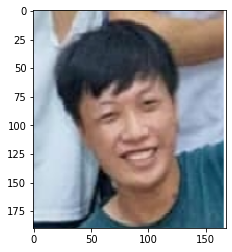

In [ ]:
img = image.load_img('/content/drive/MyDrive/Thư mục không có tiêu đề/basedata/test/Quan/1.png')
plt.imshow(img)

In [ ]:
cv2.imread('/content/drive/MyDrive/Thư mục không có tiêu đề/basedata/test/Quan/1.png').shape

(190, 168, 3)

Xử lý dữ liệu

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Thư mục không có tiêu đề/basedata/train',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/Thư mục không có tiêu đề/basedata/validation',
                                                    target_size=(200,200),
                                                    batch_size=3,
                                                    class_mode='binary')

Found 84 images belonging to 3 classes.
Found 83 images belonging to 3 classes.


In [ ]:
validation_dataset.class_indices

{'Nhat': 0, 'Quan': 1, 'Quang': 2}

Tạo model

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu',
                 kernel_initializer = 'he_uniform',
                 padding = 'same',
                 input_shape=(200,200,3)))
model.add(Conv2D(16,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation='relu',
                 kernel_initializer = 'he_uniform',
                 padding = 'same',
                 input_shape=(200,200,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu',
                 kernel_initializer = 'he_uniform',
                 padding = 'same',
                 input_shape=(200,200,3)))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',
                kernel_initializer = 'he_uniform'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 conv2d_36 (Conv2D)          (None, 200, 200, 16)      2320      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 conv2d_38 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                 

Training

In [ ]:
#opt=SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer=RMSprop(lr=0.01),loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(train_dataset,
                  steps_per_epoch= 3,
                  epochs=50,
                  batch_size=64,
                  validation_data= validation_dataset)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


3/3 [==============================] - 3s 684ms/step - loss: -4122446.2500 - accuracy: 0.5556 - val_loss: 297951744.0000 - val_accuracy: 0.3494
Epoch 2/50
3/3 [==============================] - 1s 532ms/step - loss: 215397728.0000 - accuracy: 0.5556 - val_loss: -2035884.1250 - val_accuracy: 0.7470
Epoch 3/50
3/3 [==============================] - 1s 534ms/step - loss: 320064.2188 - accuracy: 0.8889 - val_loss: -4555945.5000 - val_accuracy: 0.7831
Epoch 4/50
3/3 [==============================] - 1s 527ms/step - loss: 141980.7500 - accuracy: 0.8889 - val_loss: -7892138.5000 - val_accuracy: 0.8193
Epoch 5/50
3/3 [==============================] - 1s 536ms/step - loss: -7326160.0000 - accuracy: 0.6667 - val_loss: -12190961.0000 - val_accuracy: 0.3494
Epoch 6/50
3/3 [==============================] - 1s 552ms/step - loss: -6727230.0000 - accuracy: 0.5556 - val_loss: -15006240.0000 - val_accuracy: 0.7952
Epoch 7/50
3/3 [==============================] - 1s 564ms/step - loss: -27869224.0000 

day la Quan


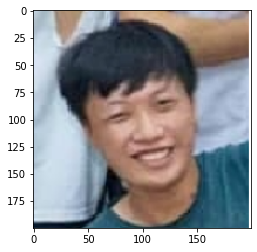

In [ ]:
#dir_path= '/content/drive/MyDrive/Thư mục không có tiêu đề/basedata/test'
#for i in os.listdir(dir_path):
img=image.load_img('/content/drive/MyDrive/Thư mục không có tiêu đề/basedata/train/Quan/1.png',target_size=(200,200))
plt.imshow(img)
plt.show
  
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
  print('day la Nhat')
elif val==1:
  print('day la Quan')
elif val==2:
  print('day la Quang')